# HW 4

## 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

### Definitions

**Standard Deviation (SD)** - Standard deviation is the measure of the spread of the data. The SD shows the deviation of the different data points from the mean and represents the variability of the data

**Standard Error of the Mean (SEM)** - The SEM is a measure of how accurate the sample mean is as a prediction of the population mean. In other words, it is the variation between multiple sample means and the actual population mean.

### The difference in what they capture

The SD shows the variability of the data points in a set of data, while the SEM is the variability of sample means relative to the actual population mean. These two measures capture two very different ideas as SD is relative to the spread of data, while the SEM relates the means of a population and its samples. 

## 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

To use the SEM to create a 95% confidence interval we will imagine a data set of the boostrapped sample means, in which the mean of this data would be our estimate of the population mean. 

In this data, the SEM would be the SD of the means. With this said, we know that 95% of the data is contained within two SD's, which in this case, would be 2 SEM's. 

Therefore, we can take:

    (the mean of the boostrapped sample means) +/- 2*(SEM)

to create the 95% confidence interval which will capture 95% of the bootstrapped sample means.

## 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

To create a 95% bootstrapped confidence interval using the bootstrapped means we would need to take a large number of independant samples (with replacement). The more samples, the more accurate our interval will be. From these samples, we calculate the mean of each.

The second step would be to take the means and sort them from least to greatest.

Finally, we would omit the first 2.5% and the last 97.5% of the data, therefore being left with the middle 95%. From here, we simply take the maximum and minimum values of the data and use those values to create the confidence interval.


### Summary of Interaction for Q1-3

We began by discussing the difference between Standard Deviation (SD) and Standard Error of the Mean (SEM):

    SD measures the spread or variability of individual data points within a dataset. It shows how much the data points deviate from the mean of the dataset.
    SEM measures the variability of the sample mean across different possible samples. It reflects the precision of the sample mean as an estimate of the population mean, and is smaller than SD because it scales with the sample size.

Next, we explored two ways to construct a 95% confidence interval for the mean:

    Using the Standard Error of the Mean (SEM):
        The confidence interval is calculated using the formula:
        CI=Sample Mean±1.96×SEM
        CI=Sample Mean±1.96×SEM
        This method provides an interval expected to contain 95% of the bootstrapped sample means, assuming the normality of the distribution of sample means.

    Using Bootstrapped Percentiles:
        This method involves generating many bootstrapped sample means by resampling with replacement.
        The 95% confidence interval is constructed by taking the 2.5th and 97.5th percentiles of the sorted bootstrapped means, directly capturing the middle 95% of the bootstrapped means without needing to estimate the SEM.

https://chatgpt.com/share/66ff0795-aef8-8012-8a2d-603c1e90d6dc 

## 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

The following code produces a 95% bootstrap confidence interval for any population parameter, as specified when calling the function "bootstrap_confidence_interval":

In [14]:
import numpy as np

# Sample data
sample = np.arange(1, 101)

# Number of bootstrap samples
n_bootstraps = 1000

# Set the confidence level
confidence_level = 0.95

# Function to calculate bootstrap confidence intervals for the population mean 
# The default is for the interval of means, but it can be changed when calling the function
def bootstrap_confidence_interval(data, n_bootstraps, confidence_level, stat_func=np.mean):
    # Array to store the bootstrap statistics
    bootstrap_statistics = np.empty(n_bootstraps)
    
    # Generate bootstrap samples and compute statistics
    for i in range(n_bootstraps):
        # Randomly sample with replacement from the data
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        
        # Compute the desired statistic (mean, median, etc.) for the bootstrap sample
        bootstrap_statistics[i] = stat_func(bootstrap_sample)
    
    # Calculate the percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_statistics, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

# Calculate the 95% bootstrap confidence interval for the population mean
mean_conf_interval = bootstrap_confidence_interval(sample, n_bootstraps, confidence_level)

print(f"95% Bootstrap Confidence Interval for the Population Mean: {mean_conf_interval}")

95% Bootstrap Confidence Interval for the Population Mean: (44.539, 55.7205)


To change which parameter the interval is made for, all that needs to be changed is the parameter "stat_func". In the case of the median, we set it to "np.median":

In [13]:
# To change the statistic to median, you can change 'stat_func=np.mean' to 'stat_func=np.median'
median_conf_interval = bootstrap_confidence_interval(sample, n_bootstraps, confidence_level, stat_func=np.median)

print(f"95% Bootstrap Confidence Interval for the Population Median: {median_conf_interval}")

95% Bootstrap Confidence Interval for the Population Median: (40.48750000000001, 60.0)


### Summary of Interaction

In this discussion, we explored how to compute a 95% bootstrap confidence interval for a population mean using Python. The code involved resampling with replacement from a sample dataset and calculating the desired statistic (mean, median, etc.) for each bootstrap sample. The key parameter, replace=True, ensures resampling with replacement, which is essential for bootstrapping. The confidence interval was obtained by calculating the appropriate percentiles of the bootstrap statistics. The method can be easily adapted to compute confidence intervals for other statistics, such as the median, by adjusting the stat_func parameter.

https://chatgpt.com/share/66ff0b7f-6884-8012-a1b7-9e976163e2f5

## 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the population parameter and the sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

The population parameter describes a fixed value of the population while the sample statistic is the same parameter calculated for a sample. This purpose of the sample statistic is to predict the population parameter as accurately as possible. 

Understanding the difference is important when it comes to confidence intervals as the reason for a "confidence interval" is because of the variability of sample statistics. It is important to recognize that the sample statistic can vary, and therefore may or may not be an accurate prediction of the population parameter. By creating a confidence interval, we can state that we are X% sure that the interval captures the population parameter. It is also important to note that the population parameter is fixed, or in other words does not change, so the discussion is not about the "chance the parameter is in the interval", it is about how confident we are that the interval "captured" or encompassed the fixed value.

By properly understanding this distinction we can make accurate predictions of the population based on statistics of the samples.

### Summary of Interaction

In our discussion, we emphasized the importance of distinguishing between population parameters and sample statistics in the context of confidence intervals. Population parameters are the true values we aim to estimate, while sample statistics are derived from the data collected. This distinction is crucial because confidence intervals quantify the uncertainty around sample estimates and provide a range of plausible values for population parameters, preventing the misinterpretation of sample statistics as true values. Additionally, confidence intervals account for variability among different samples and aid in hypothesis testing and assessing significance. Understanding this difference is essential for informed decision-making and for guiding researchers in obtaining reliable estimates. Overall, recognizing the distinction between population parameters and sample statistics is vital for accurately interpreting confidence intervals and making valid inferences from data.

https://chatgpt.com/share/66ff0b7f-6884-8012-a1b7-9e976163e2f5

## 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
1. What is the process of bootstrapping?
2. What is the main purpose of bootstrapping?
3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

#### My answers:

1. The process of bootstrapping is taking multiple random samples from a set of data, or a population, and performing analysis on the taken samples. By analyzing the variation in the statistics of the bootstrapped samples, we can make assumptions about the original sample or population. An important thing to note is that the samples are made with "replacement", meaning the same value can be chosen more than once.

2. The main purpose of bootstrapping is to estimate, or guess, characteristics or "parameters" of the larger population.

3. The following would be the steps to assess whether or not my (hypothesized) guess might be plausible:
    1. Take a large number (such as 100,000) of random samples from my original sample, with replacement, all of size n.
    2. For each bootstrapping sample, calculate the mean of the sample.
    3. Order the sample means from least to greatest.
    4. Remove the bottome 2.5% and top 97.5% of values, therefore leaving you with the middle 95%.
    5. Take the lowest and highest value, therefore creating a 95% confidence interval. 
    6. Finally, verify if my hypothesis falls within my confidence interval. If so, I can say that I am 95% confident that the mean of the original sample is within that range, and therefore could be my hypothesis. 

## 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

A confidence interval overlapping zero means we "fail to reject the null hypothesis", even though the observed sample mean statistic itself is not zero, because the observed sample mean may not be zero due to chance. In the example in the video, the drug testing only used one random sample. Basing any conclusion on a single sample is not reliable, which is why we apply bootsrapping. 

Ideally, we would take a large number of observed samples and take the mean from those, however this would be expensive. Therefore, bootstrapping is a good method to understand the uncertainty of our single observed sample. Through bootstrapping, as shown in the video, we can create a confidence interval that shows a range in which the true mean most likely lies. Since 0 is within this range, we can be 95% confident that the real mean is within the range, and therefore possible 0. 

This therefore means that we cannot reject the idea that the drug actually did have no effect.

On the other hand, if the confidence interval did not include 0, we could conclude that to some degree, the drug did have a positive effect. This is because we can say we are 95% confident that the real mean is within our interval, which does not include 0, therefore meaning we are confident that the drug did have an effect.

## 8. Vaccine Data Analysis Assignment

### Introduction

AliTech has created a new vaccine that aims to improve the health of the people who take it. 

In the following report we will examine whether or not the drug as any affect on the health of those who take the vaccine. The following data was provided based on a sample of patients:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTxYov5OiGGZZ4kBBsnyY_TioJMBAYr0pIMrxnpNJPNNQvyBGO4jDFiPGWeMKKtoLRjPpPxdIjoYV_U/pub?output=csv"
df = pd.read_csv(url)

# Add a column that holds the change in health for each patient
df['change_h'] = df['final_health_score'] - df['initial_health_score']

print("Figure 1:\n")
print(df)

Figure 1:

   patient_id  age gender  initial_health_score  final_health_score  change_h
0           1   45      M                    84                  86         2
1           2   34      F                    78                  86         8
2           3   29      M                    83                  80        -3
3           4   52      F                    81                  86         5
4           5   37      M                    81                  84         3
5           6   41      F                    80                  86         6
6           7   33      M                    79                  86         7
7           8   48      F                    85                  82        -3
8           9   26      N                    76                  83         7
9          10   39      F                    83                  84         1


Figure 1 above shows the initial data, with the addition of a column displaying the change in the health of each patient. 

From this sample we can create a visualisation of the changes in health in the form of a histogram. Furthermore, by computing the mean of the changes in health, we can create a hypothesis of how effective the vaccine is. As shown below, we can guess that, on average, the vaccine improves health by 3.3: 

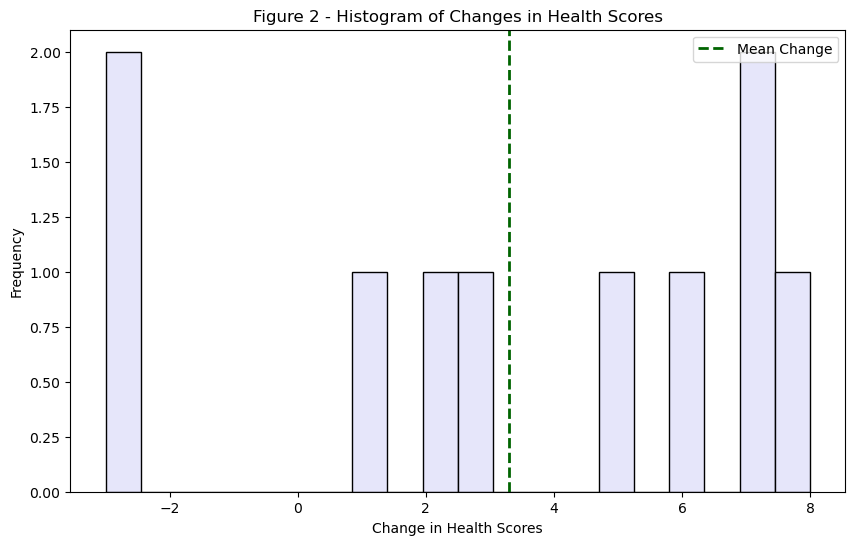


Hypothesis:  3.3


In [23]:
change_h_u = df['change_h'].mean()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['change_h'], bins=20, color='lavender', edgecolor='black')

# Add a vertical line for the mean
plt.axvline(change_h_u, color='darkgreen', linestyle='dashed', linewidth=2, label='Mean Change')

# Add labels and title
plt.xlabel('Change in Health Scores')
plt.ylabel('Frequency')
plt.title('Figure 2 - Histogram of Changes in Health Scores')
plt.legend()

plt.savefig("fig1.png", format='png')

# Show the plot
plt.show()
print("\nHypothesis: ",change_h_u)

Figure 2 above displays the distribution of the changes in health among the patients. The green bar shows the mean change, which as stated is 3.3. However, this information from one sample alone is not sufficient to conclude the efficacy of the vaccine. It is possible that this sample is an outlier in terms of the overall population of those who have taken the vaccine.

This also means that we cannot rule out the possibility that the vaccine has no effect, which we can refer to as a "null hypothesis".

### Methodology

To come to a conclusion, we will use the method of bootstrapping. This means that we will generate a large number of new samples from our original, which will be sampled randomly with replacement.

After creating the bootstrapping samples we can calculate the means of each sample. By taking the middle 95% of the means, we can determine a confidence interval to understand if our initial hypothesis of 3.3 is reasonable, and whether or not a null hypothesis could be made.

### Analysis

First, we will create the samples, calculate the means of each, and display them on a histogram:

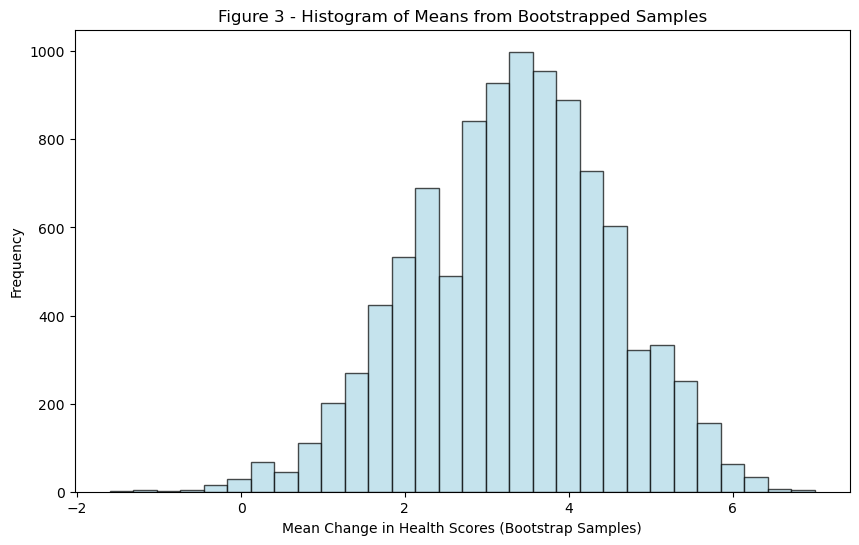

In [24]:
# Set a random seed for reproducibility
np.random.seed(42)

# Number of bootstrapped samples
n_bootstrap_samples = 10000
bootstrap_means = []

# Bootstrapping process
for _ in range(n_bootstrap_samples):
    # Create a bootstrapped sample
    sample = np.random.choice(df['change_h'], size=len(df), replace=True)
    # Calculate the mean of the bootstrapped sample
    bootstrap_means.append(np.mean(sample))

# Create the histogram of the bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='lightblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Mean Change in Health Scores (Bootstrap Samples)')
plt.ylabel('Frequency')
plt.title('Figure 3 - Histogram of Means from Bootstrapped Samples')

plt.savefig("fig2.png", format='png')

# Show the plot
plt.show()

For this report, we have created 10,000 bootstrapping samples. Figure 3 above shows the distribution of the means of these 10,000 samples.

From here, we can mark off the lowest 2.5% and the highest 97.5% of the values. This will leave us with the middle 95% of the means.

Finally, we will take the minimum and maximum value of this range of values to create our 95% confidence interval.

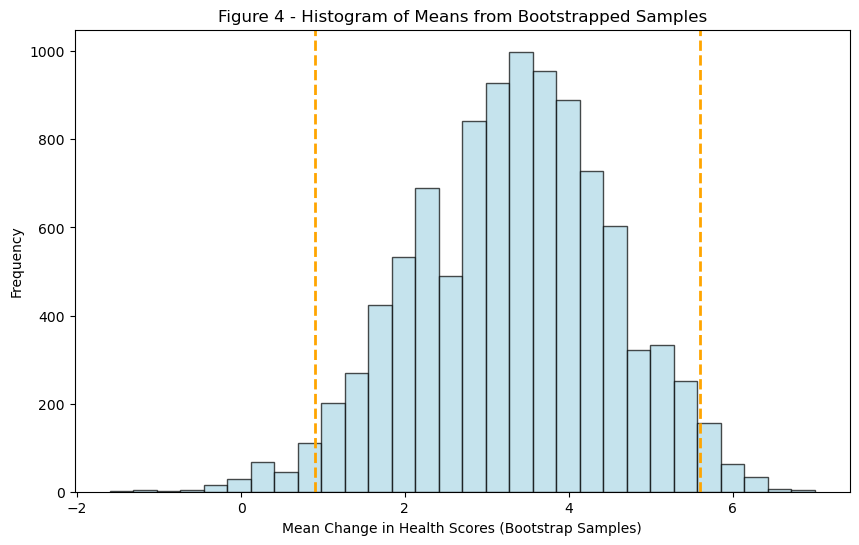

95% Confidence Interval for the Mean Change in Health Scores: [0.90, 5.60]


In [25]:
# Create the histogram of the bootstrap means

lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='lightblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Mean Change in Health Scores (Bootstrap Samples)')
plt.ylabel('Frequency')
plt.title('Figure 4 - Histogram of Means from Bootstrapped Samples')

plt.axvline(lower_bound, color='orange', linestyle='dashed', linewidth=2, label='2.5th Percentile')
plt.axvline(upper_bound, color='orange', linestyle='dashed', linewidth=2, label='97.5th Percentile')

plt.savefig("fig3.png", format='png')

# Show the plot
plt.show()

# Print the confidence interval
print(f"95% Confidence Interval for the Mean Change in Health Scores: [{lower_bound:.2f}, {upper_bound:.2f}]")

As stated by Figure 4 above, our 95% confidence interval is [0.90, 5.60]. 

### Conclusion

We can interpret several things from this information:

Firstly, to understand what this interval means, we can say that it means "we are 95% sure that the actual average change in health, of the population of those who took the vaccine, will fall between 0.9 and 5.6."

Secondly, we can conclude that our initial hypothesis of 3.3 is reasonable, as it falls within the range of which we have 95% confidence in.

Finally, we can rule out the null hypothesis, as "0" does not fall within our confidence interval. This means that we are 95% confident that the vaccine does not have no effect. 

In conclusion, we can conclude that we are 95% confident that the vaccine is effective to some degree. It is important to note that to gain a more reliable insight into its efficacy, we would need to take more observable samples. However, given only this sample, 95% confidence is a strong enough to conclude that it is an effective vaccine.



### Summary of Interaction

In this analysis, I examined the changes in health scores by calculating the difference between initial and final scores. Using bootstrapping with 10,000 samples, I computed the mean change in health scores and constructed a 95% confidence interval. The null hypothesis, which assumes no significant change in health scores, was tested by checking if the confidence interval includes zero. A histogram of the bootstrapped means provided visual insight into the distribution of health score changes. The analysis concludes by determining whether to reject or accept the null hypothesis based on the confidence interval.

https://chatgpt.com/share/66ff5297-6d7c-8012-b936-4c63dab08aa4

## 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

yes